In [12]:
import demes
import demesdraw

<Axes: ylabel='time ago (generations)'>

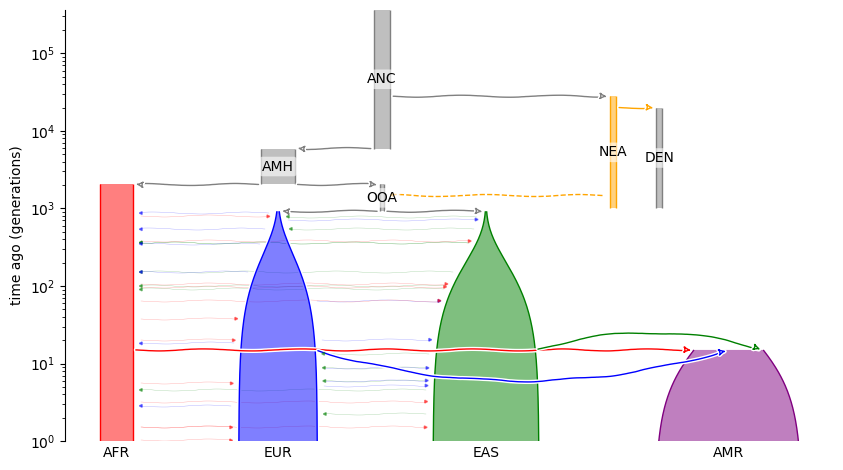

In [82]:
simple_dem = demes.load("full_demographic_model.yaml")
demesdraw.tubes(simple_dem, num_lines_per_migration=6, log_time=True, seed=1234, 
                colours={'AFR': 'red', 'EUR': 'blue', 'EAS': 'green', 'AMR': 'purple', 'NEA': 'orange'},
                positions={"AFR": 10000, "AMH": 80000, "EUR": 80000, "EAS": 170000, "OOA": 125000, "AMR": 275000, 
                           'NEA': 225000, 'DEN': 245000, 'ANC': 125000}
                
               )


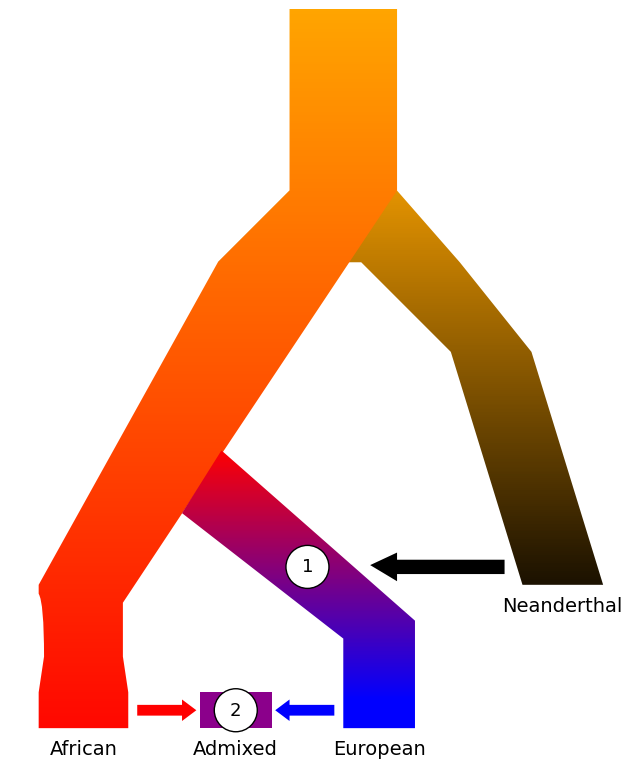

In [18]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(8, 11))
Path = mpath.Path

path_african = [(Path.MOVETO, (-110, 700)),
                (Path.LINETO, (-110, 300)),
                (Path.LINETO, (-150, 260)),
                (Path.LINETO, (-250, 80)),
                (Path.LINETO, (-250, 75)),
                (Path.CURVE3, (-247, 70)),
                (Path.LINETO, (-247, 40)),
                (Path.LINETO, (-250, 20)),
                (Path.LINETO, (-250, 0)),
                (Path.LINETO, (-200, 0)),
                (Path.LINETO, (-200, 20)),
                (Path.LINETO, (-203, 40)),
                (Path.LINETO, (-203, 70)),
                (Path.CURVE3, (-200, 75)),
                (Path.LINETO, (-50, 300)),
                (Path.LINETO, (-50, 700)),
                (Path.CLOSEPOLY, (-110, 400)),
                ]


path_neanderthal = [(Path.MOVETO, (-110, 300)),
                    (Path.LINETO, (-150, 260)),
                    (Path.LINETO, (-70, 260)),
                    (Path.LINETO, (-20, 210)),
                    (Path.LINETO, (20, 80)),
                    (Path.LINETO, (65, 80)),
                    (Path.LINETO, (25, 210)),
                    (Path.LINETO, (25, 210)),
                    (Path.LINETO, (-15, 260)),
                    (Path.LINETO, (-50, 300)),
                    (Path.CLOSEPOLY, (-110, 300))
             ]


path_europeans = [(Path.MOVETO, (-170, 120)),
                  (Path.LINETO, (-80, 50)),
                  (Path.LINETO, (-80, 0)),
                  (Path.LINETO, (-40, 0)),
                  (Path.LINETO, (-40, 60)),  
                  (Path.LINETO, (-148, 155)),                  
                  (Path.CLOSEPOLY, (-170, 120))
                 ]

path_admixed = [(Path.MOVETO, (-160, 0)),
                (Path.LINETO, (-120, 0)),
                (Path.LINETO, (-120, 20)),
                (Path.LINETO, (-160, 20)),
                (Path.CLOSEPOLY, (-160, 0))
                 ]

nea_intro = [(Path.MOVETO, (10, 86)),
             (Path.LINETO, (10, 94)),
             (Path.LINETO, (-50, 94)),
             (Path.LINETO, (-50, 98)),
             (Path.LINETO, (-65, 91)),
             (Path.LINETO, (-50, 82)),
             (Path.LINETO, (-50, 86)),
             (Path.CLOSEPOLY, (10, 86))
            ]

admix_eur = [(Path.MOVETO, (-85, 7)),
             (Path.LINETO, (-110, 7)),
             (Path.LINETO, (-110, 4)),
             (Path.LINETO, (-118, 10)),
             (Path.LINETO, (-110, 16)),
             (Path.LINETO, (-110, 13)),
             (Path.LINETO, (-85, 13)),
             (Path.CLOSEPOLY, (-85, 7))
            ]

admix_afr = [(Path.MOVETO, (-195, 7)),
             (Path.LINETO, (-170, 7)),
             (Path.LINETO, (-170, 4)),
             (Path.LINETO, (-162, 10)),
             (Path.LINETO, (-170, 16)),
             (Path.LINETO, (-170, 13)),
             (Path.LINETO, (-195, 13)),
             (Path.CLOSEPOLY, (-195, 7))
            ]

alpha=1
vmax=600


codes, verts = zip(*path_neanderthal)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='none', ec='none', alpha=0.5, animated=True)
ax.add_patch(patch)
ax.annotate("Neanderthal", (42, 65), ha='center', fontsize=14)

cmap = sns.color_palette("blend:black,orange", as_cmap=True)
Z = np.repeat(np.arange(0, 600), 2).reshape(600, 2)
im = plt.imshow(Z, cmap=cmap,alpha=alpha,
                origin='lower', extent=[-266, 140, -20, 401],
                clip_path=patch, clip_on=True, vmin=100, vmax=500)

codes, verts = zip(*path_african)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='none', ec='none', alpha=0.5, animated=True)
ax.add_patch(patch)
ax.annotate("African", (-225, -15), ha='center', fontsize=14)

cmap = sns.color_palette("blend:red,orange", as_cmap=True)
Z = np.repeat(np.arange(0, 600), 2).reshape(600, 2)
im = plt.imshow(Z, cmap=cmap,
                origin='lower', extent=[-266, 140, -20, 401],
                clip_path=patch, clip_on=True, vmin=0, vmax=vmax)


codes, verts = zip(*path_europeans)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='none', ec='none', alpha=0.5, animated=True)
ax.add_patch(patch)
ax.annotate("European", (-60, -15), ha='center', fontsize=14)

cmap = sns.color_palette("blend:blue,red", as_cmap=True)
Z = np.repeat(np.arange(0, 600), 2).reshape(600, 2)
im = plt.imshow(Z, cmap=cmap,
                origin='lower', extent=[-266, 140, -20, 401],
                clip_path=patch, clip_on=True, vmin=50, vmax=250)


codes, verts = zip(*path_admixed)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='darkmagenta', ec='none', alpha=1, animated=True)
ax.add_patch(patch)
ax.annotate("Admixed", (-140, -15), ha='center', fontsize=14)

codes, verts = zip(*nea_intro)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='black', ec='none', alpha=1, animated=True)
ax.add_patch(patch)

codes, verts = zip(*admix_afr)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='red', ec='none', alpha=1, animated=True)
ax.add_patch(patch)

codes, verts = zip(*admix_eur)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='blue', ec='none', alpha=1, animated=True)
ax.add_patch(patch)


circle = mpatches.Circle((-140, 10), 12, facecolor='white', edgecolor='black')
ax.add_patch(circle)
ax.text(-140, 10, "2", ha='center', va='center', fontsize=13)

circle = mpatches.Circle((-100, 90), 12, facecolor='white', edgecolor='black')
ax.add_patch(circle)
ax.text(-100, 90, "1", ha='center', va='center', fontsize=13)

# ax.arrow(10, 100, -60, 0)|

ax.set_xlim([-266, 80])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])




# ax.plot([-265, -255], [348, 352], color='black')
# ax.plot([-265, -255], [354, 358], color='black')
# ax.annotate("", xy=(-260, 350), xytext=(-260, -1), color='black', arrowprops=dict(arrowstyle="->"))
# ax.plot([-260, -264], [0, 0], color='black')
# ax.plot([-260, -264], [100, 100], color='black')
# ax.plot([-260, -264], [200, 200], color='black')
# ax.plot([-260, -264], [300, 300], color='black')
# ax.plot([-260, -264], [400, 400], color='black')

# ax.annotate('0', (-266, 0), ha='right', va='center')
# ax.annotate('100', (-266, 100), ha='right', va='center')
# ax.annotate('200', (-266, 200), ha='right', va='center')
# ax.annotate('300', (-266, 300), ha='right', va='center')


# ax.set_ylabel("Time (kya)", labelpad=20)
fig.savefig("population_tree.png", dpi=600)
fig.savefig("population_tree.pdf", dpi=600)